<h2>Exercise</h2>
You have the following list:<br>
<code>
product_numbers = ['AS-500','TR-700','TR-800','TR-100','AX-131','AX-232','AL-3400','TR-300']
</code><br>
You need to process the product_numbers as a batch process but all of the<br>
processes that start with 'TR' need to be run first.  Arrange the list so that<br>
they are in the beginning of the list.<br>

<h4>Solution</h4>

In [1]:
# process the product_numbers as a batch

product_numbers = ['AS-500','TR-700','TR-800','TR-100','AX-131','AX-232','AL-3400','TR-300']

# processes that start with 'TR' need to be run first.
product_numbers.sort(reverse=True)
# Arrange the list so that they are in the beginning of the list.
print(product_numbers)
print("==" * 35)
# list comprehension
product_order = [pn for pn in product_numbers if pn.startswith('TR')] + \
[pn for pn in product_numbers if not pn.startswith('TR')] 
print(product_order)
print("==" * 35)

# Function method
def trsGoFirst(lst):
    startsWithTRlist = []
    otherList = []
    sortedList = []
    for i in lst:
        if(i[:2] == 'TR'):
            startsWithTRlist.append(i)
        else:
            otherList.append(i)
    sortedList = startsWithTRlist + otherList
    return sortedList

trsGoFirst(product_numbers)


['TR-800', 'TR-700', 'TR-300', 'TR-100', 'AX-232', 'AX-131', 'AS-500', 'AL-3400']
['TR-800', 'TR-700', 'TR-300', 'TR-100', 'AX-232', 'AX-131', 'AS-500', 'AL-3400']


['TR-800',
 'TR-700',
 'TR-300',
 'TR-100',
 'AX-232',
 'AX-131',
 'AS-500',
 'AL-3400']

<h2>Exercise</h2>
You have the following data structure:<br>
<code>
processes = [{'command':'docker build -t python101:1.0'},
             'Reboot server',
             'Data cleaning',
             {'command': 'git stash','server':'mid west'}]
</code><br>
How do you execute the process that contains the command - 'git stash' first?<br>

<h4>Solution</h4>

In [1]:
processes = [{'command':'docker build -t python101:1.0'},
             'Reboot server',
             'Data cleaning',
             {'command': 'git stash','server':'mid west'}]
process = [p for p in processes if isinstance(p,dict) and p.get('command') == 'git stash'] + \
[p for p in processes if not (isinstance(p,dict) and p.get('command') == 'git stash') ] 
print(process)

[{'command': 'git stash', 'server': 'mid west'}, {'command': 'docker build -t python101:1.0'}, 'Reboot server', 'Data cleaning']


<h2>Covariance</h2>
Covariance is the measure of the directional relationship between two random variables<br><br>
$\sum_{i=1}^{n} (X_i - meanX)(Y_i - meanY)$/(n-1)<br><br>
Where X is the first list of data and Y is the second list.

For example.  If we measured the temperate on 7 consecutive summer days and<br>
also measure ice_cream_sales for the same 7 consecutive days.  The covariance will<br>
measure the direction of the relationship between the 2 lists.<br>
<code>
temperatures = [89, 93, 77, 79, 93, 95, 94]
icecream_sales = [20000, 25000, 16000, 18000, 21000, 24000, 23000]
</code>

<h4>Solution</h4>

In [2]:
import math
class BaseStatistics:
    def __init__(self,base_list):
        base_list.sort()
        self.ordered = base_list
        self.list_len = len(self.ordered)
        
    def calc_mean(self):
        if len(self.ordered) > 0:
            return round(sum(self.ordered)/self.list_len,2)

    def calc_median(self):
        if self.list_len % 2 == 0:
            pos = (self.list_len/2) - 1
            median = (self.ordered[int(pos+1)] + self.ordered[int(pos)])/2
        else:
            median = self.ordered[int(((self.list_len + 1)/2) - 1)] 
        return median
    
    def calc_mode(self):
        mode = None
        temp_mode = {}
        for num in self.ordered:
            if num not in temp_mode:
                temp_mode[num] = 0
            temp_mode[num] += 1
        # print(temp_mode)
        ans_sort = sorted(temp_mode.items(),key = lambda kv: kv[1] , reverse = True)
        # print(ans_sort)

        # Step 1 - Get the max number
        max_num = ans_sort[0][1]

        # Use the value to get all of the keys with that value using list comprehension
        if max_num > 1:
            mode = [num[0] for num in ans_sort if num[1] == max_num]
        return mode
        
    def calc_max(self):
        return max(self.ordered)
    
    def calc_min(self):
        return min(self.ordered)
    
    def calc_range(self):
        return self.calc_max() - self.calc_min()
    
    def calc_stdev(self):
        mean = self.calc_mean()
        variance = sum([(x-mean)**2 for x in self.ordered])/len(self.ordered)
        return math.sqrt(variance)
    
    def calc_skewness(self):
        mean = self.calc_mean()
        skew_part1 = sum([(x-mean)**3 for x in self.ordered])/len(self.ordered)
        return round(skew_part1/(self.calc_stdev()**3),3)

    def calc_adjusted_skewness(self):
        mean = self.calc_mean()
        skew_part1 = sum([(x-mean)**3 for x in self.ordered])/len(self.ordered)
        return round(math.sqrt((self.list_len*(self.list_len-1)))/(self.list_len-2),2) * (skew_part1/(self.calc_stdev()**3))
    
    def calc_excess_kurtosis(self):
        mean = self.calc_mean()
        kurt_part1 = sum([(x-mean)**4 for x in self.ordered])/len(self.ordered)
        return (round(kurt_part1/(self.calc_stdev()**4),3)) - 3

    @staticmethod
    def calc_covariance(list_x,list_y):
        mean_x = sum(list_x)/len(list_x)
        mean_y = sum(list_y)/len(list_y)
        x_1 = [(x-mean_x) for x in list_x]
        y_1 = [(y-mean_y) for y in list_y]
        return sum([x_1[i]*y_1[i] for i in range(len(x_1))])/(len(x_1)-1)

temperatures = [89, 93, 77, 79, 93, 95, 94]
icecream_sales = [20000, 25000, 16000, 18000, 21000, 24000, 23000]

covar = BaseStatistics.calc_covariance(temperatures,icecream_sales)
print(f'The covariance = {covar}')

direction = 'positive' if covar > 0 else 'negative'
print(f'The covariance of temperatures and icecream sales is directionaly {direction}')

The covariance = 22333.333333333332
The covariance of temperatures and icecream sales is directionaly positive


<h2>Object Oriented Programming</h2>

<h4>Static Methods</h4>
A static method is a method that is part of the class but does<br>
not use the self reference and can be called outside of the class structure.<br>
The decoratored method could be a regular function but due to its relationship<br>
with the other methods it is included in the class.

<h4>Class Methods</h4>
Class methods don't need a class instance. They can't access the instance ( self ) but they <br>
have access to the class itself via cls 

In [3]:
from datetime import date as dt
class Employee:
    def __init__(self, name, gender, age):
        self.name = name
        self.gender = gender
        self.age = age
        
    @staticmethod
    def isAdult(age):
        return True if age > 18 else False
        
    @classmethod
    def get_age(cls, name, gender, year):
        '''
        the cls argument (which can be named anything) gives us access to the
        methods to an instance of the class
        '''
        return cls(name, gender, dt.today().year - year)  # This instatiates the class instance
    
    def __str__(self):
        return f'\nEmployee\n Name: {self.name}\n Gender: {self.gender}\n Age: {self.age}'
    
emp1 = Employee('Stephen', 'M', 30)
print(emp1)

emp2 = Employee.get_age('Gloria', 'F', 1995)
print(emp2)
print(Employee.isAdult(25))  # Call the static method
print(Employee.isAdult(16))  # Call the static method


Employee
 Name: Stephen
 Gender: M
 Age: 30

Employee
 Name: Gloria
 Gender: F
 Age: 26
True
False


<h2>Exercise</h2>
Create a class called Geometry.  The class should include the following:<br>
1 - constructor that takes up to 3 arguments for shape type, side 1, side 2, side 3<br>
2 - static method for calc_perimeter<br>
3 - static method for calc_area<br>
4 - The shape types are: C for Circle, T for Triangle, R for Rectangle<br>


In [4]:
import math
from functools import reduce
import numpy as np
import math

class Geometry:
    def __init__(self,shape_type,*sides):
        self.shape_type = shape_type
        self.get_shape_name()
        self.sides = [x for x in sides]
        print(self.sides)
        
    def get_shape_name(self):
        if self.shape_type == 'C':
            res = 'Circle'
        elif self.shape_type == 'T':
            res = 'Triangle'
        elif self.shape_type == 'R':
            res = 'Rectangle'            
        else:
            res = 'NOT DEFINED'
        return res
    
    @staticmethod
    def calc_area(shape_type,*sides):
        if shape_type == 'R':
            res = reduce(lambda x,y: x*y,sides)
        elif shape_type == 'T':
            print(len(sides))
            res = reduce(lambda x,y: x*y,sides)
        elif shape_type == 'C':
            print(len(sides))
            res = ((np.array(sides) /2) ** 2) * math.pi
        return res



r1 = Geometry('T',10,2,3)            
print(r1.get_shape_name())

res = Geometry.calc_area('R',10,4)
print(res)

print('='*35)

r1 = Geometry('R',10,12)            
print(r1.get_shape_name())

print('='*35)
r1 = Geometry('C',10)            
print(r1.get_shape_name())




[10, 2, 3]
Triangle
40
[10, 12]
Rectangle
[10]
Circle


<h2>Correlation</h2>
The correlation is a measure of the direction of the relation of 2 lists and the<br>
strength of the relation.  The correlation can only be a number from -1 to 1.  A positive<br>
correlation of .7 or more is significant and signals that there is a strong relationship<br>
between the 2 data sets. When there is a rise in one of the numbers in the list there is also <br>
a rise in the value of the corresponding index value.  A negative correlation of -.07 to 1 means<br>
that there is an inverse relationship between the 2 lists.  When one of the values in 1st list<br>
goes up, the value in the other list will go down.<br>
The formula for correlation is:<br>
<br>
$ covariance/(S_x* S_y)$<br><br>
Where S is the standard deviation of each data set

<h2>Exercise</h2>
Find the correlation of the following data sets:<br>
<code>
temperatures = [89, 93, 77, 79, 93, 95, 94]
icecream_sales = [20000, 25000, 16000, 18000, 21000, 24000, 23000]
</code>

<h4>Solution</h4>

In [5]:
import math
class BaseStatistics:
    def __init__(self,base_list=[]):
        base_list.sort()
        self.ordered = base_list
        self.list_len = len(self.ordered)
        
    def calc_mean(self):
        if len(self.ordered) > 0:
            return round(sum(self.ordered)/self.list_len,2)

    def calc_median(self):
        if self.list_len % 2 == 0:
            pos = (self.list_len/2) - 1
            median = (self.ordered[int(pos+1)] + self.ordered[int(pos)])/2
        else:
            median = self.ordered[int(((self.list_len + 1)/2) - 1)] 
        return median
    
    def calc_mode(self):
        mode = None
        temp_mode = {}
        for num in self.ordered:
            if num not in temp_mode:
                temp_mode[num] = 0
            temp_mode[num] += 1
        # print(temp_mode)
        ans_sort = sorted(temp_mode.items(),key = lambda kv: kv[1] , reverse = True)
        # print(ans_sort)

        # Step 1 - Get the max number
        max_num = ans_sort[0][1]

        # Use the value to get all of the keys with that value using list comprehension
        if max_num > 1:
            mode = [num[0] for num in ans_sort if num[1] == max_num]
        return mode
        
    def calc_max(self):
        return max(self.ordered)
    
    def calc_min(self):
        return min(self.ordered)
    
    def calc_range(self):
        return self.calc_max() - self.calc_min()
    
    def calc_stdev(self):
        mean = self.calc_mean()
        variance = sum([(x-mean)**2 for x in self.ordered])/(len(self.ordered)-1)
        return math.sqrt(variance)
    
    def calc_skewness(self):
        mean = self.calc_mean()
        skew_part1 = sum([(x-mean)**3 for x in self.ordered])/(len(self.ordered)-1)
        return round(skew_part1/(self.calc_stdev()**3),3)

    def calc_adjusted_skewness(self):
        mean = self.calc_mean()
        skew_part1 = sum([(x-mean)**3 for x in self.ordered])/len(self.ordered)
        return round(math.sqrt((self.list_len*(self.list_len-1)))/(self.list_len-2),2) * (skew_part1/(self.calc_stdev()**3))
    
    def calc_excess_kurtosis(self):
        mean = self.calc_mean()
        kurt_part1 = sum([(x-mean)**4 for x in self.ordered])/len(self.ordered)
        return (round(kurt_part1/(self.calc_stdev()**4),3)) - 3

    @staticmethod
    def calc_covariance(list_x,list_y):
        mean_x = sum(list_x)/len(list_x)
        mean_y = sum(list_y)/len(list_y)
        x_1 = [(x-mean_x) for x in list_x]
        y_1 = [(y-mean_y) for y in list_y]
        return sum([x_1[i]*y_1[i] for i in range(len(x_1))])/(len(x_1)-1)

    @classmethod
    def calc_correlation(cls,list_x,list_y):
        '''
        We need to declare this as a class method to have access to the calc_stdev
        methods.  We have access using the cls argument.
        '''
        x = cls(list_x)
        stdev_x = x.calc_stdev()
        # print(f'st dev x = {stdev_x}')
        y = cls(list_y)
        stdev_y = y.calc_stdev()
        # print(f'st dev y = {stdev_y}')
        covar = cls.calc_covariance(list_x,list_y)
        # print(f'*** {covar}')
        return covar/(stdev_x*stdev_y)
        
temperatures = [89, 93, 77, 79, 93, 95, 94]
icecream_sales = [20000, 25000, 16000, 18000, 21000, 24000, 23000]

print('='*35)
t1 = BaseStatistics(temperatures)
stdev = t1.calc_stdev()
print(f'The standard deviation of temperatures = {stdev}')

print('='*35)
c1 = BaseStatistics(icecream_sales)
stdev = c1.calc_stdev()
print(f'The standard deviation of icecream sales = {stdev}')


covar = BaseStatistics.calc_covariance(temperatures,icecream_sales)

print(f'The covariance = {covar}')

direction = 'positive' if covar > 0 else 'negative'
print(f'The covariance of temperatures and icecream sales is directionaly {direction}')

print('='*35)
correl = BaseStatistics.calc_correlation(temperatures,icecream_sales)
print(f'The correlation = {correl}')

signif = 'strong' if correl and abs(correl) >= .7 else 'weak'
print(f'The correlation of temperatures and icecream sales is {signif}')

The standard deviation of temperatures = 7.480132574582709
The standard deviation of icecream sales = 3265.986323710904
The covariance = 22833.33333333333
The covariance of temperatures and icecream sales is directionaly positive
The correlation = 0.9346427893470419
The correlation of temperatures and icecream sales is strong


<h2>Exercise</h2>
We have the following class called 'Deck_of_Cards'<br>
<code>
class Deck_of_Cards:
    def __init__(self):
        self.cards = self.create_deck()
        
    def create_deck(self):
        face_cards = ['Jack','Queen','King','Ace']
        non_face_cards = list(range(2,11))
        suit = ['Spades','Clubs','Hearts','Diamonds']
        cards = [f'{card} of {s}' for card in non_face_cards + face_cards for s in suit]
        return cards

    def __str__(self):
        return f'There are {self.number_of_cards} cards in the deck'
    
new_deal = Deck_of_Cards()
print(new_deal.cards)
</code>
<br>
Create the following methods:<br>
1 - 'shuffle' to reorder the cards<br>
2 - 'cut' which takes in an interger or defaults to zero which is called a tap and no<br>
reorder is done.<br>
3 - 'deal' which takes in 1 arguments the number of cards and removes them from the deck<br>



In [7]:
import random

class Deck_of_Cards:
    def __init__(self):
        self.cards = self.create_deck()
        self.number_of_cards = len(self.cards)
        
    def create_deck(self):
        face_cards = ['Jack','Queen','King','Ace']
        non_face_cards = list(range(2,11))
        suit = ['Spades','Clubs','Hearts','Diamonds']
        cards = [f'{card} of {s}' for card in non_face_cards + face_cards for s in suit]
        return cards
    
    def __str__(self):
        return f'There are {self.number_of_cards} cards in the deck'
            
    def shuffle(self):
        random.shuffle(self.cards)
        
    def cut(self,num_of_cards_to_cut = 0):
        if num_of_cards_to_cut == 0:
            print('You tapped the cards')
        if num_of_cards_to_cut > 0 and num_of_cards_to_cut < self.number_of_cards:
            self.cards = self.cards[num_of_cards_to_cut:] + self.cards[:num_of_cards_to_cut]
    
    def deal(self,cards_to_deal=1):
        if cards_to_deal > self.number_of_cards:
            print('You cannot deal more cards than are in the deck')
        else:
            for i in range(cards_to_deal):
                if self.number_of_cards > 0:
                    card = self.cards[0]
                    print(f'Dealt {card}')
                    # remove the card
                    self.cards.remove(card)
                    self.number_of_cards -= 1
        
new_deal = Deck_of_Cards()
print(new_deal.cards)
new_deal.shuffle()
print(new_deal)
print(new_deal.cards)
new_deal.cut(20)
print(new_deal.cards)
new_deal.deal(10)
print(new_deal.cards)
new_deal.deal(10)
print(new_deal.cards)
new_deal.deal(10)
print(new_deal.cards)
new_deal.deal(10)
print(new_deal.cards)
new_deal.deal(10)
print(new_deal.cards)
new_deal.deal(3)
print(new_deal.cards)

['2 of Spades', '2 of Clubs', '2 of Hearts', '2 of Diamonds', '3 of Spades', '3 of Clubs', '3 of Hearts', '3 of Diamonds', '4 of Spades', '4 of Clubs', '4 of Hearts', '4 of Diamonds', '5 of Spades', '5 of Clubs', '5 of Hearts', '5 of Diamonds', '6 of Spades', '6 of Clubs', '6 of Hearts', '6 of Diamonds', '7 of Spades', '7 of Clubs', '7 of Hearts', '7 of Diamonds', '8 of Spades', '8 of Clubs', '8 of Hearts', '8 of Diamonds', '9 of Spades', '9 of Clubs', '9 of Hearts', '9 of Diamonds', '10 of Spades', '10 of Clubs', '10 of Hearts', '10 of Diamonds', 'Jack of Spades', 'Jack of Clubs', 'Jack of Hearts', 'Jack of Diamonds', 'Queen of Spades', 'Queen of Clubs', 'Queen of Hearts', 'Queen of Diamonds', 'King of Spades', 'King of Clubs', 'King of Hearts', 'King of Diamonds', 'Ace of Spades', 'Ace of Clubs', 'Ace of Hearts', 'Ace of Diamonds']
There are 52 cards in the deck
['King of Clubs', 'Ace of Spades', '5 of Diamonds', '8 of Spades', 'Jack of Hearts', '7 of Hearts', '7 of Spades', '4 of Cl

<h2>Exercise</h2>

Take the numbers from  100 to 1000
break the categories into groups of 100
In each group place the number of prime numbers
chart as a bar chart

135
127
120
119
114
117
107
110
112
106


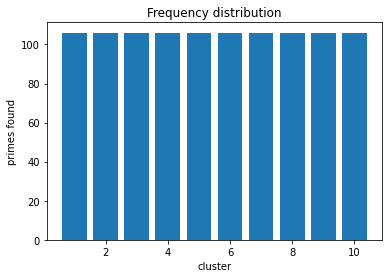

In [6]:
import math
import matplotlib.pyplot as plt

def isPrime(num):
    prime = False
    if num > 1:
        prime = True
        for i in range(2,int(math.sqrt(num))+1):
            if num % i == 0:
                prime = False
                break
    return prime

factor = 1000
for j in range(1,11):
    primes = sum([1 for i in range(factor*j,factor*(j+1)) if isPrime(i)])
    print(primes)
xAxis = range(1,11)
plt.bar(xAxis,primes)
plt.title('Frequency distribution')
plt.xlabel('cluster')
plt.ylabel('primes found')
plt.show()    

<h4>Conclusion</h4>
Prime number are dispersed evenly amougst the number line.

<h2>Exercise</h2>
Without using the built in max function in python, find the maximum value<br>
in the following sequence:<br>
<code>
x = [1,2,0,5,1,4,-1,2]
</code>

<h4>Solution</h4>

In [7]:
import math

x = [1,2,0,5,1,4,-1,2]
maxNumber = -math.inf
for i in x:
    maxNumber = i if i > maxNumber else maxNumber
print('New max number {0}'.format(maxNumber))

New max number 5
